In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import numpy as np
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pickle
import dill
from joblib import dump, load
import statistics

In [2]:
file_path = '/Users/campbelle2/Desktop/obesity_prediction/'

rand_seeds = load(file_path + 'rand_seeds_200.joblib')

In [3]:
results = load('/Users/campbelle2/Desktop/obesity_prediction/RF_results_200.joblib')

In [4]:
results['auc']

{103689: [0.7495009917088932,
  0.7579217566213216,
  0.7566875521260418,
  0.7569482699410582,
  0.7573701842546063,
  0.756938457980278,
  0.7563294155575648,
  0.6693095883882454,
  0.6827589832005214,
  0.67714549035274,
  0.6793962840702816,
  0.6816193940413364,
  0.6832432735504581,
  0.6787634125999593,
  0.5764477898558342,
  0.583199119726947,
  0.5884057666295214,
  0.5825900773042338,
  0.5858378363224771,
  0.5779574301073008,
  0.5859219388434502,
  0.7291229508771193,
  0.7330175984525137,
  0.732602342255209,
  0.7334724529201097,
  0.7333932563795268,
  0.7332734102871401,
  0.7334612392506465,
  0.7602408836371537,
  0.7625582585171324,
  0.7616839427261832,
  0.7615970367878445,
  0.7617386093648156,
  0.7610489686928368,
  0.761789771731741,
  0.7519679989907697,
  0.7526285542075789,
  0.7534720324075047,
  0.7533970409929704,
  0.7539724424072947,
  0.7532701863571695,
  0.7532905111330712,
  0.7308877021088708,
  0.7349165632906512,
  0.7355333151111204,
  0.7371

In [5]:
auc_plot = []

In [6]:
auc_plot = []
for seed in results['auc']:
    auc_plot.append(results['auc'][seed])
auc_plot = np.array(auc_plot)        

In [7]:
auc_plot.shape

(200, 378)

In [8]:
mean_auc = np.mean(auc_plot, axis = 0)

In [9]:
max(mean_auc)

0.7696213354078619

In [10]:
max_id = np.where(mean_auc == max(mean_auc))[0][0]

In [11]:
opt_col = auc_plot[:,max_id]

(array([ 3.,  2., 10., 24., 41., 39., 39., 26., 12.,  4.]),
 array([0.74423407, 0.74886539, 0.7534967 , 0.75812802, 0.76275933,
        0.76739065, 0.77202196, 0.77665328, 0.7812846 , 0.78591591,
        0.79054723]),
 <a list of 10 Patch objects>)

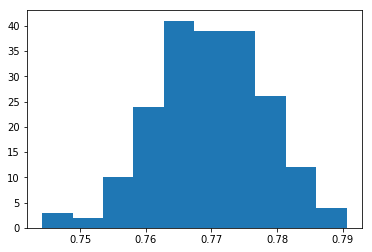

In [12]:
plt.hist(opt_col)

In [13]:
with open(file_path + 'ml_data.pik', "rb") as f:
            data = dill.load(f)

In [14]:
x = data['x']
y = data['y']

In [15]:
statistics.mean(opt_col)

0.7696213354078622

In [16]:
statistics.stdev(opt_col)

0.008372031554784373

In [17]:
def subgroup_analysis(subgroup_name):
    bootstrap_subgroup_metrics = dict.fromkeys(rand_seeds)

    for seed in rand_seeds:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = seed)

        temp_df = pd.DataFrame()
        temp_df[subgroup_name] = x_test[subgroup_name].values
        temp_df['y_true'] = y_test.values
        temp_df['y_pred_prob'] = results['prediction_probabilities'][seed][max_id][:,1]
        if subgroup_name == 'race':
            temp_df = temp_df.loc[temp_df[subgroup_name]!= 6]

        subgroup_cat = temp_df[subgroup_name].unique()
        subgroup_metrics = dict.fromkeys(subgroup_cat)

        for cat in subgroup_cat:
            subset = temp_df.loc[temp_df[subgroup_name] == cat]
            auc = roc_auc_score(subset.y_true.values, subset.y_pred_prob.values)
            subgroup_metrics[cat] = auc

        bootstrap_subgroup_metrics[seed] = subgroup_metrics
        
    metrics = list(bootstrap_subgroup_metrics.values())
    res_list = dict.fromkeys(subgroup_cat)
    for i in res_list:
        res_list[i] = []

    for cat in subgroup_cat:
        for res in metrics:
            res_list[cat].append(res[cat])
    
    
    return bootstrap_subgroup_metrics, res_list
    

In [18]:
print(results.keys())

dict_keys(['auc', 'prediction_probabilities'])


In [19]:
_, gender_metrics = subgroup_analysis('gender_concept_id')

In [20]:
male = gender_metrics[0]

In [21]:
female = gender_metrics[1]

In [22]:
statistics.mean(male)

0.7685937537433575

In [23]:
statistics.stdev(male)

0.012363852132393246

In [24]:
statistics.mean(female)

0.7697180667569277

In [25]:
statistics.stdev(female)

0.012415363286075143

In [26]:
_, medicaid_metrics = subgroup_analysis('medicaid') 

In [27]:
no_med = medicaid_metrics[0]
med = medicaid_metrics[1]

In [28]:
statistics.stdev(no_med)

0.010567441079420576

In [29]:
statistics.mean(no_med)

0.7499962607422733

In [30]:
statistics.mean(med)

0.788408065393576

In [31]:
statistics.stdev(med)

0.013194582166707262

In [32]:
_, agecat_metrics = subgroup_analysis('age_cat') 

In [33]:
young = agecat_metrics[1]

In [34]:
statistics.mean(young)

0.7521667225560513

In [35]:
statistics.stdev(young)

0.016839313843326605

In [36]:
middle = agecat_metrics[2]

In [37]:
statistics.mean(middle)

0.7921320980357476

In [38]:
statistics.stdev(middle)

0.012060549534114867

In [39]:
old = agecat_metrics[3]

In [40]:
statistics.mean(old)

0.7526778641491202

In [41]:
statistics.stdev(old)

0.015433875381796415

In [42]:
_, asian = subgroup_analysis('race_1')

In [43]:
asian = asian[1]

In [44]:
statistics.mean(asian)

0.7608081551534325

In [45]:
statistics.stdev(asian)

0.05214472447725335

In [46]:
_, AA = subgroup_analysis('race_2')
AA = AA[1]
statistics.mean(AA)


0.786614973882164

In [47]:
statistics.stdev(AA)

0.014992073079538317

In [48]:
_, white = subgroup_analysis('race_3')
white = white[1]
statistics.mean(white)


0.7498490029197514

In [49]:
statistics.stdev(white)

0.011427071697226225

In [50]:
_, hispanic = subgroup_analysis('race_4')
hispanic = hispanic[1]
statistics.mean(hispanic)

0.7544639383741232

In [51]:
statistics.stdev(hispanic)

0.043171384965606886

In [52]:
_, multi = subgroup_analysis('race_5')
multi = multi[1]
statistics.mean(multi)

0.7426521800641004

In [53]:
statistics.stdev(multi)

0.08491417574879172

In [54]:
_, unknown = subgroup_analysis('race_7')
unknown = unknown[1]
statistics.mean(unknown)

0.7332573726230315

In [55]:
statistics.stdev(unknown)

0.03475087464835246